<a href="https://colab.research.google.com/github/danilovabg/SkillFactory/blob/master/MATH_ML_2__Practica_Danilova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

%matplotlib inline

Прочитаем исходные данные:

In [53]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

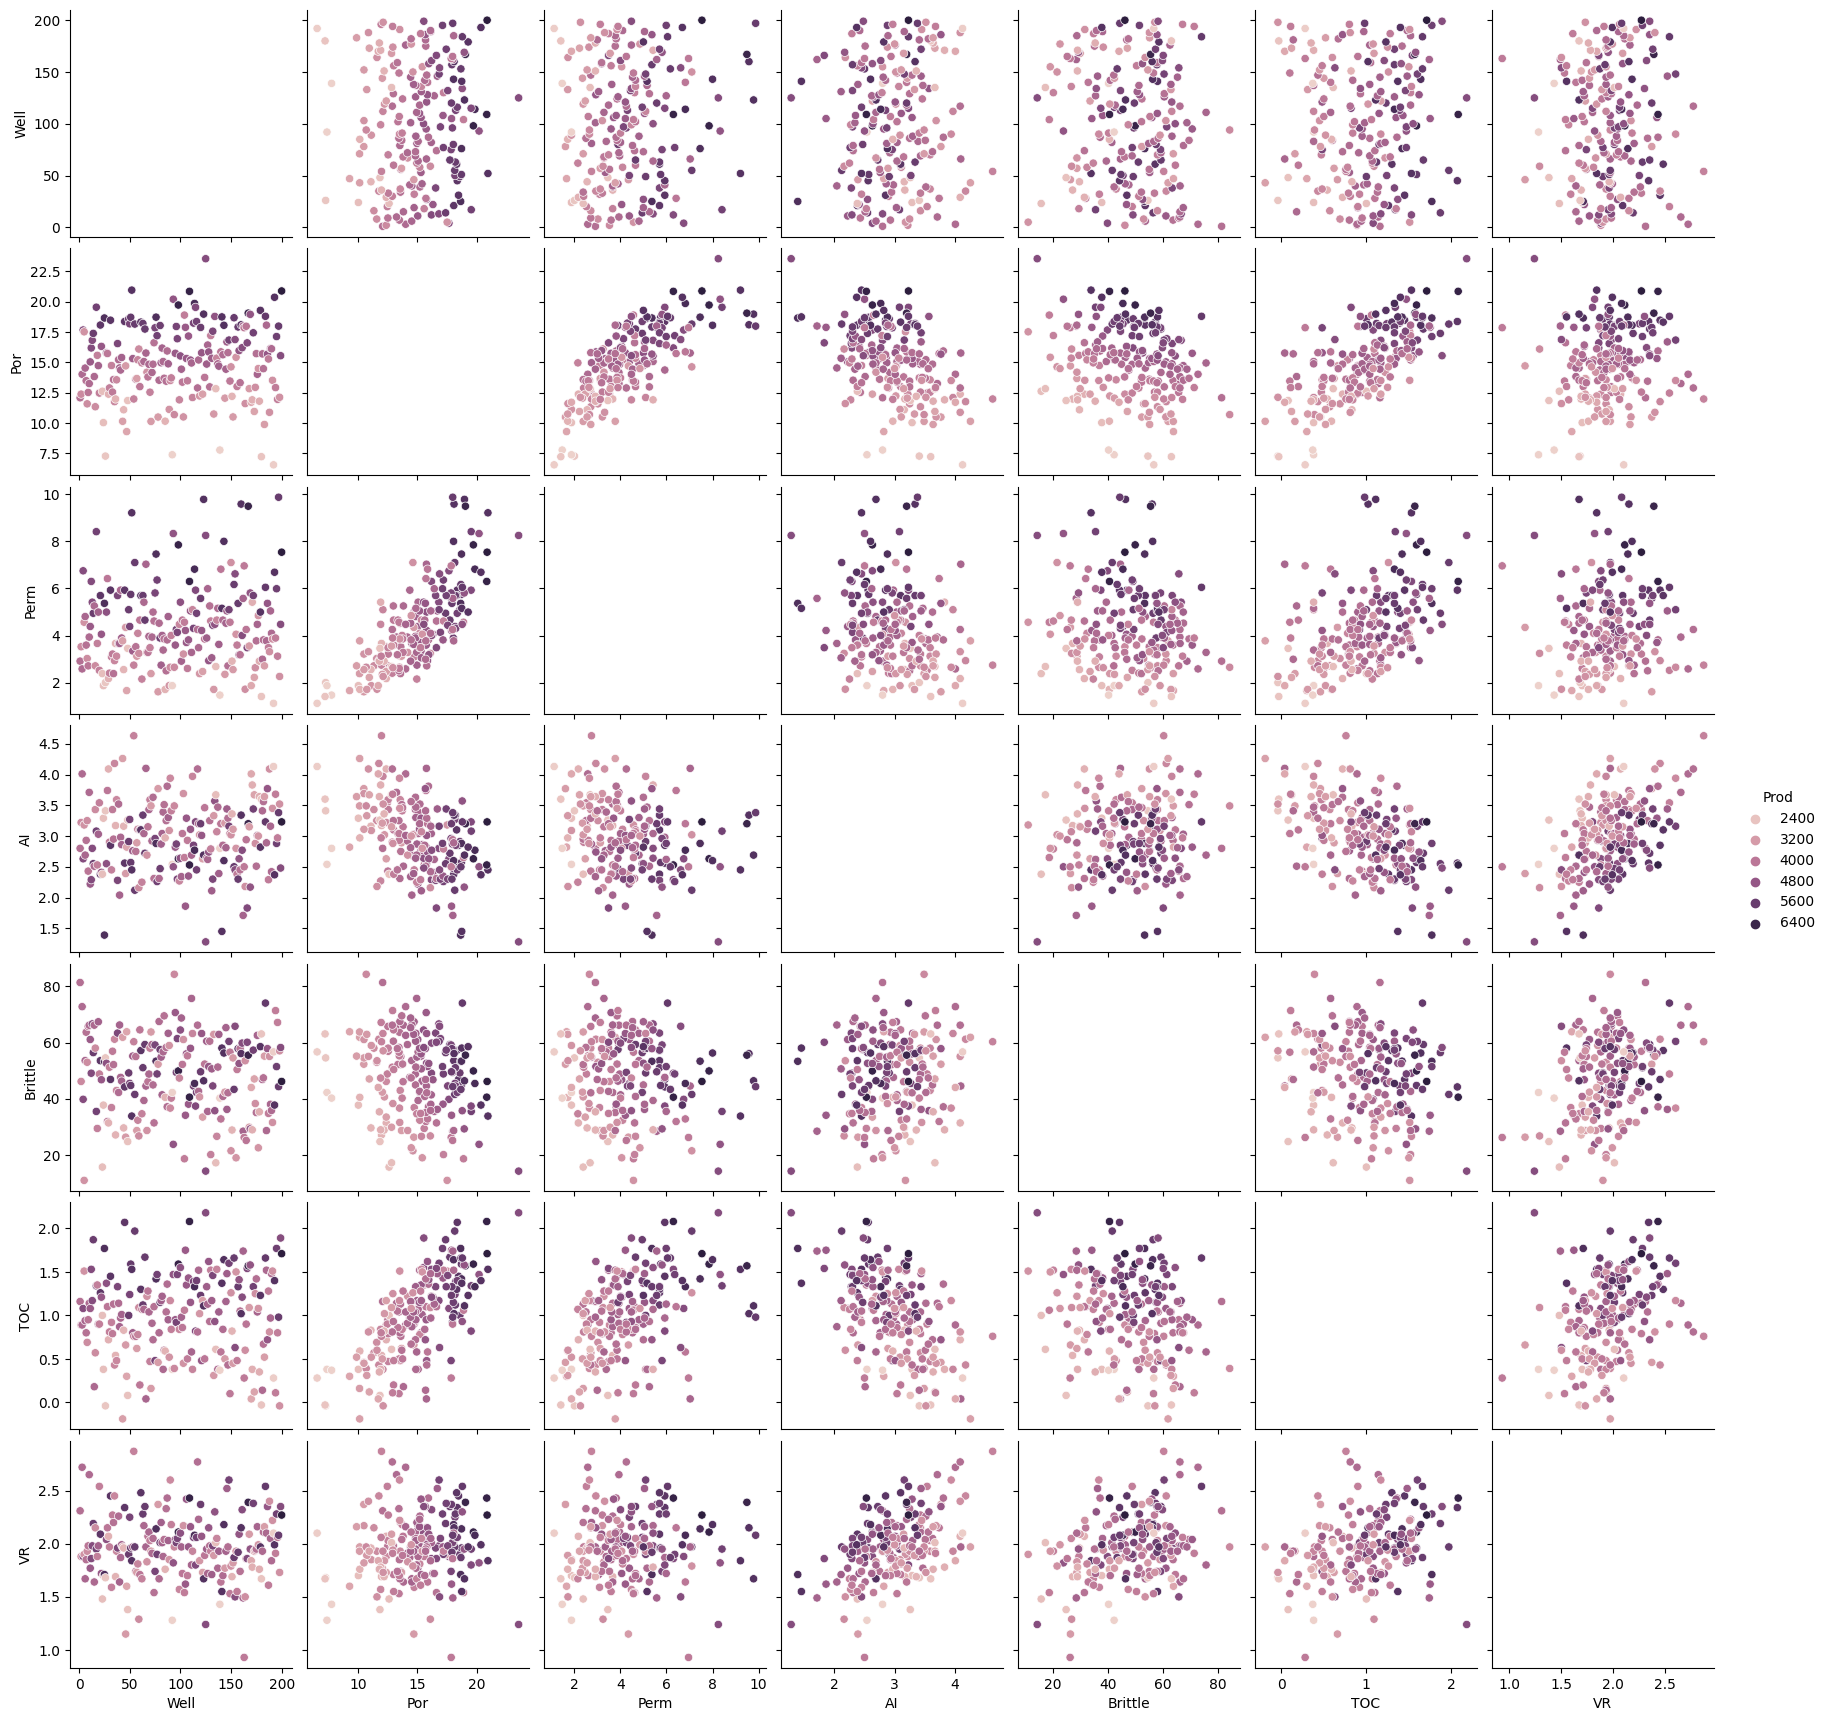

In [ ]:
# Ваш код здесь
sns.pairplot(data, hue = 'Prod')

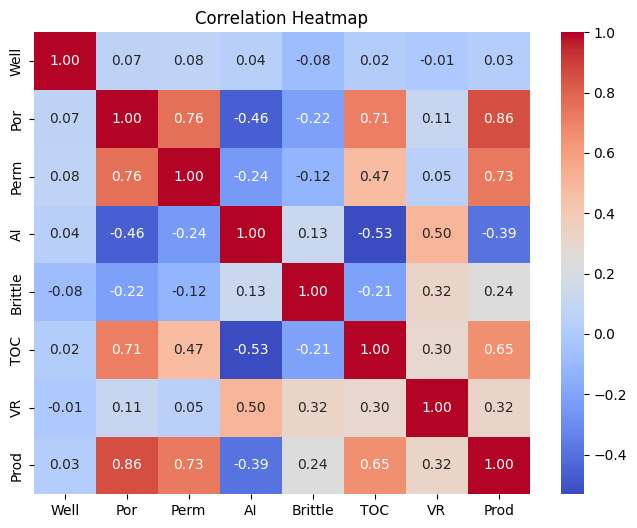

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Из корреляционной матрицы видно что переменные Por и Perm имеют высокую корреляцию, можем говорить о том что наблюдаем мультиколинеарность

Так же видно что есть сильная корреляция между таргетом и переменными Por, Perm, TOC

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Матрица и вывод о корреляциях - выше
f'Rank of correlation matrix is {np.linalg.matrix_rank(data.corr())}, Determinant of correlation matrix is {np.linalg.det(data.corr()):.4f}'

'Rank of correlation matrix is 8, Determinant of correlation matrix is 0.0007'

> *Ваши выводы здесь*
Из корреляционной матрицы видно что переменные Por и Perm имеют высокую корреляцию, можем говорить о том что наблюдаем мультиколинеарность

Так же видно что есть сильная корреляция между таргетом и переменными Por, Perm, TOC


Корреляционная матрица плохо обусловлена, определитель близок к 0.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [54]:
# Ваш код здесь
y = data['Prod']
X = data.drop('Prod', axis =1)
X['w0'] = 1 #добавляю колонку с единицами (свободный член)
w = np.linalg.inv(X.T@X)@(X.T@y)
w



array([ 5.07003631e-02,  2.30179140e+02,  1.16239006e+02, -3.65202301e+02,
        2.49943700e+01, -7.84009294e+01,  7.85259815e+02, -1.23230803e+03])

In [55]:
for name, coeff in zip(X.columns, w):
  print(name, round(coeff, 4))

Well 0.0507
Por 230.1791
Perm 116.239
AI -365.2023
Brittle 24.9944
TOC -78.4009
VR 785.2598
w0 -1232.308


> *Ваши выводы здесь*

Согласно найденным целым коэффициентам, признак Well является неинформативным и не оказывает влияния на целевую переменную


самое сильное влияние на предсказание модели вносит свободный слен (то есть внешние факторы не учтеные в модели), реально он уменьшает прогнозируемую добычу на 1232 милл. куб. м. газа в день

Переменные VR, Por, Perm увеличивают предсказание модели пропорционально найденным коэффициентам


топ 3 самых важных переменных: VR, AI, Por (свободный член не считаю фичей)

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [56]:
# Ваш код здесь
new = np.array([106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42, 1])
prod =  4748.315024
print(f'Predicted {sum(new*w):.4f}')

Predicted 4723.0641


In [57]:
e = prod - new@w
f'Error {e:.4f}'

'Error 25.2510'

In [58]:
mape_train = mean_absolute_percentage_error(y, X@w)*100
mae_train = mean_absolute_error(y, X@w)
print(f'MAPE at train set is {mape_train:.1f}')

print(f'MAE at train set is {mae_train:.1f}')

MAPE at train set is 362.8
MAE at train set is 153.6


In [59]:
row = {'Model': ['OLS'],
        'Parameters': ['not scaled, all features'],
        'Train_MAPE': [round(mape_train, 2)],
        'Train_MAE': [round(mae_train, 2)],
        'Test_MAPE': [0],
        'Test_MAE': [0]}
results_table = pd.DataFrame(row)
results_table

,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0,0


> *Ваши выводы здесь*
прогнозируемая добыча газа с новой скважины - 4723.1
реальная добыча 4748.32

В целом прогноз достаточно близок к реальному результату.

Рассчитав метрику МАРЕ для тренировочного датасета я получила результат равный 3,6%, то есть в среднем модель ошибается на 3,6%


Однако расчет метрики на тренировочных данных не показатель хорошей работы модели, нужно сравнивать метрики с тестовым наборо


То же самое касаетси и метрики МАЕ, нужно смотреть даную метрику в сравнеии с тестовой выборкой


средняя абсолютная ошибка на тренировочных данных 153,6

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [60]:
data.corr().loc['Prod',:]

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

In [61]:
for name, coeff in zip(X.columns, w):
  print(name, round(coeff, 4))

Well 0.0507
Por 230.1791
Perm 116.239
AI -365.2023
Brittle 24.9944
TOC -78.4009
VR 785.2598
w0 -1232.308


> *Ваши выводы здесь*

фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции - VOC
Корреляция говорит, что зависимость между фактором и целью прямая, а модель говорит обратное.

Данное противорече получается из-за наличия мультиколинеарност

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [ ]:
data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


Удалим переменную Well так как ее корреляция с таргетом меньше 0,05, то есть она не влияет на прогноз, но зашумляет данные

В наших данных можной найти пары с высокой корреляцией: (Por, Perm) (Toc, Por)
в первой паре видно что с таргетом Por коррелирует сильнее, по этому удалим Perm

во второй паре Toc имеет меньшую корреляцю с таргетом, по этому удалим и его

In [62]:
# Ваш код здесь
y = data['Prod']
X = data.drop(['Well', 'Prod', 'TOC', 'Perm'], axis = 1)
X['w0'] = 1

w = np.linalg.inv(X.T@X)@(X.T@y)

for name, coeff in zip(X.columns, w):
  print(name, int(round(coeff, 0)))

print('\n')
print(f'MAPE at train set is {mean_absolute_percentage_error(y, X@w)*100:.1f}')
print(f'MAE at train set is {mean_absolute_error(y, X@w):.1f}')
MAPE_OLS = mean_absolute_percentage_error(y, X@w)*100
MAE_OLS = mean_absolute_error(y, X@w)

Por 293
AI -200
Brittle 28
VR 517
w0 -1835


MAPE at train set is 404.4
MAE at train set is 171.4


In [63]:
row = {'Model': 'OLS_choosen_features',
        'Parameters': f'selected features {X.columns}',
        'Train_MAPE': round(MAPE_OLS, 2),
        'Train_MAE': round(MAE_OLS, 2),
        'Test_MAPE': 0,
        'Test_MAE': 0}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-63-39ee73bdb89a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0,0
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0,0


> *Ваши выводы здесь*
- Well 0.0507
- Por 230.1791    293
- Perm 116.239
- AI -365.2023    -200
- Brittle 24.9944 28
- TOC -78.4009
- VR 785.2598     517
- w0 -1232.308    1835

после удаления "лишних" факторов видно что влиеняе интерсепта увеличилось и поменяло свой знак, теперь этот параметр увеличивает предсказание

так же видно как увеличился вклад в предсказание переменных Por и Brittle, в то время как переменная VR стала "слабее"

С помощью преобразований матрицы Х удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции, но не смотря на проделанную работу с переменными, метрики ухудшились

средний процент ошики стал 4% против 3,6%

МАЕ увеличилась до 171 со 154

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Ваш код здесь
y = data['Prod']
X = data.drop(['Well', 'Prod', 'TOC', 'Perm'], axis = 1)

lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [66]:
lr_model.coef_

array([ 293.03624565, -200.03091206,   27.64098209,  517.40272597])

In [67]:
for name, c, w_c in zip(X.columns, lr_model.coef_, w):
  print(f'{name}, Linear reggr {int(round(c, 0))}, OLS {int(round(c, 0))}')

Por, Linear reggr 293, OLS 293
AI, Linear reggr -200, OLS -200
Brittle, Linear reggr 28, OLS 28
VR, Linear reggr 517, OLS 517


In [68]:
pred_lr = lr_model.predict(X)
print(f'MAPE at train set is {mean_absolute_percentage_error(y, pred_lr)*100:.1f}')
print(f'MAE at train set is {mean_absolute_error(y, pred_lr):.1f}')
MAPE_LR = mean_absolute_percentage_error(y, pred_lr)*100
MAE_LR = mean_absolute_error(y, pred_lr)
print(f'MAPE OLS {MAPE_OLS:.2f}, LR {MAPE_LR:.2f}')
print(f'MAE OLS {MAE_OLS:.2f}, LR {MAE_LR:.2f}')

MAPE at train set is 404.4
MAE at train set is 171.4
MAPE OLS 404.41, LR 404.41
MAE OLS 171.43, LR 171.43


In [69]:
row = {'Model': 'Log_reg',
        'Parameters': f'selected features {X.columns}',
        'Train_MAPE': round(MAPE_LR, 2),
        'Train_MAE': round(MAE_LR, 2),
        'Test_MAPE': 0,
        'Test_MAE': 0}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-69-df578e9dfc27>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0,0
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0,0
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0,0


> *Ваши выводы здесь*

Коеффициенты полученные с помощью метода наименьших квадратов и линейной регрессии реализованной в Склерн - совпали


Так как коэффициенты одинаково, логично что и результаты метрик тоже совпали

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [70]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [71]:
# Ваш код здесь
y = data['Prod']
X = data.drop('Prod', axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
poly = PolynomialFeatures(include_bias = False)

X_poly = poly.fit_transform(X_scaled, 3)
X_poly.shape, X_scaled.shape

((200, 35), (200, 7))

In [73]:
lr_model = LinearRegression()

scores = cross_validate(lr_model, X_poly, y, cv=5, scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error'], return_train_score=True)

mse_scores = -scores['test_neg_mean_absolute_error']
MAPE_scores = -scores['test_neg_mean_absolute_percentage_error']

print(f"Mean MАE at test: {mse_scores.mean():.2f}")
print(f"Mean MAPE at test: {MAPE_scores.mean()*100:.2f}", end = 2*'\n')


mse_scores_train = -scores['train_neg_mean_absolute_error']
MAPE_scores_train = -scores['train_neg_mean_absolute_percentage_error']

print(f"Mean MАE at train: {mse_scores_train.mean():.2f}")
print(f"Mean MAPE at train: {MAPE_scores_train.mean()*100:.2f}")

Mean MАE at test: 85.85
Mean MAPE at test: 2.11

Mean MАE at train: 60.73
Mean MAPE at train: 1.45


In [74]:
row = {'Model': 'Log_reg',
        'Parameters': f'scaled and polynomial 3',
        'Train_MAPE': round(MAPE_scores_train.mean()*100, 2),
        'Train_MAE': round(mse_scores_train.mean(), 2),
        'Test_MAPE': round(MAPE_scores.mean()*100, 2),
        'Test_MAE': round(mse_scores.mean(), 2)}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-74-8eaceaa981a2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0.00,0.00
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
3,Log_reg,scaled and polynomial 3,1.45,60.73,2.11,85.85


> *Ваши выводы здесь*

C с помощью скалирования признаков и создания полиномиальных фичей удалось улучшить метрики, так средний процент ошибки упал до 2,11% а МАЕ уменьшилась до 85,6

результаты метрик на трейне значительно лучше метрик на тесте, что говорит о переобучении

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [75]:
# Ваш код здесь
from sklearn.metrics import make_scorer
params = {'alpha': np.arange(0, 10, 0.1)}

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Specify the scoring metric as a dictionary
scoring = {'mae': 'neg_mean_absolute_error', 'mape': mape_scorer}

lasso = Lasso()
grid_cv = GridSearchCV(lasso, params, cv = 5, verbose = 10, n_jobs = -1, return_train_score=True, scoring=scoring, refit=False)
grid_cv.fit(X_poly, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             refit=False, return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False)},
             verbose=10)

In [76]:
best_tial = np.argmax(grid_cv.cv_results_['mean_test_mae'])
print(f"Mean MАE at test: {-grid_cv.cv_results_['mean_test_mae'][best_tial]:.2f}")
print(f"Mean MAPE at test: {-grid_cv.cv_results_['mean_test_mape'][best_tial]:.2f}", end = 2*'\n')

print(f"Mean MАE at train: {-grid_cv.cv_results_['mean_train_mae'][best_tial]:.2f}")
print(f"Mean MAPE at train: {-grid_cv.cv_results_['mean_train_mape'][best_tial]:.2f}")

print(f"Best alpha is {params['alpha'][best_tial]:.1f}")

Mean MАE at test: 75.47
Mean MAPE at test: 1.81

Mean MАE at train: 61.92
Mean MAPE at train: 1.45
Best alpha is 2.8


In [77]:
row = {'Model': 'Lasso',
        'Parameters': f'scaled and polynomial 3',
        'Train_MAPE': round(-grid_cv.cv_results_['mean_train_mape'][best_tial], 2),
        'Train_MAE': round(-grid_cv.cv_results_['mean_train_mae'][best_tial], 2),
        'Test_MAPE': round(-grid_cv.cv_results_['mean_test_mape'][best_tial], 2),
        'Test_MAE': round(-grid_cv.cv_results_['mean_test_mae'][best_tial], 2)}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-77-54e8ab4db8d3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0.00,0.00
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
3,Log_reg,scaled and polynomial 3,1.45,60.73,2.11,85.85
4,Lasso,scaled and polynomial 3,1.45,61.92,1.81,75.47


> *Ваши выводы здесь*
С помощью подбора параметра альфа Лассо регуляризации удалось уменьшить разницу между показателями на трейне и на тесте

Кроме того что сократилась разница в метриках, в результате подбора параметра альфа результаты не тресте оказались лучше в сравнении с предыдущей моделью (полиномиальной регрессией)


### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [78]:
# Ваш код здесь
from sklearn.metrics import make_scorer
params = {'alpha': np.arange(0, 100, 0.1)}

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Specify the scoring metric as a dictionary
scoring = {'mae': 'neg_mean_absolute_error', 'mape': mape_scorer}

ridge = Ridge()
grid_cv = GridSearchCV(ridge, params, cv = 5, verbose = 10, n_jobs = -1, return_train_score=True, scoring=scoring, refit=False)
grid_cv.fit(X_poly, y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7...
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             refit=False, return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False)},
             verbose=10)

In [79]:
best_tial = np.argmax(grid_cv.cv_results_['mean_test_mae'])
print(f"Mean MАE at test: {-grid_cv.cv_results_['mean_test_mae'][best_tial]:.2f}")
print(f"Mean MAPE at test: {-grid_cv.cv_results_['mean_test_mape'][best_tial]:.2f}", end = 2*'\n')

print(f"Mean MАE at train: {-grid_cv.cv_results_['mean_train_mae'][best_tial]:.2f}")
print(f"Mean MAPE at train: {-grid_cv.cv_results_['mean_train_mape'][best_tial]:.2f}")

print(f"Best alpha is {params['alpha'][best_tial]:.1f}")

Mean MАE at test: 85.37
Mean MAPE at test: 2.10

Mean MАE at train: 61.09
Mean MAPE at train: 1.46
Best alpha is 0.4


In [80]:
row = {'Model': 'Ridge',
        'Parameters': f'alpha 0.4, scaled and polynomial 3, Gridsearch',
        'Train_MAPE': round(-grid_cv.cv_results_['mean_train_mape'][best_tial], 2),
        'Train_MAE': round(-grid_cv.cv_results_['mean_train_mae'][best_tial], 2),
        'Test_MAPE': round(-grid_cv.cv_results_['mean_test_mape'][best_tial], 2),
        'Test_MAE': round(-grid_cv.cv_results_['mean_test_mae'][best_tial], 2)}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-80-2bc2c59e9b55>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0.00,0.00
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
3,Log_reg,scaled and polynomial 3,1.45,60.73,2.11,85.85
4,Lasso,scaled and polynomial 3,1.45,61.92,1.81,75.47
5,Ridge,"alpha 0.4, scaled and polynomial 3, Gridsearch",1.46,61.09,2.10,85.37


> *Ваши выводы здесь*

Результаты с Л2 регуляризацией оказались хуже чем Л1

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [81]:
# Ваш код здесь
from sklearn.metrics import make_scorer
params = {'l1_ratio': np.arange(0.1, 1, 0.01), 'alpha': np.arange(0.1, 1, 0.01)}

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Specify the scoring metric as a dictionary
scoring = {'mae': 'neg_mean_absolute_error', 'mape': mape_scorer}

elastic = ElasticNet()
grid_cv = GridSearchCV(elastic, params, cv = 5, verbose = 10, n_jobs = -1, return_train_score=True, scoring=scoring, refit=False)
grid_cv.fit(X_poly, y)

Fitting 5 folds for each of 8100 candidates, totalling 40500 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.6...
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])},
             refit=False, return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False)},
             verbose=10)

In [82]:
best_trial = np.argmax(grid_cv.cv_results_['mean_test_mae'])
print(f"Mean MАE at test: {-grid_cv.cv_results_['mean_test_mae'][best_trial]:.2f}")
print(f"Mean MAPE at test: {-grid_cv.cv_results_['mean_test_mape'][best_trial]:.2f}", end = 2*'\n')

print(f"Mean MАE at train: {-grid_cv.cv_results_['mean_train_mae'][best_trial]:.2f}")
print(f"Mean MAPE at train: {-grid_cv.cv_results_['mean_train_mape'][best_trial]:.2f}")

print(f"Best params is {grid_cv.cv_results_['params'][best_trial]}")


Mean MАE at test: 80.03
Mean MAPE at test: 1.95

Mean MАE at train: 63.00
Mean MAPE at train: 1.49
Best params is {'alpha': 0.9899999999999995, 'l1_ratio': 0.9899999999999995}


In [83]:
row = {'Model': 'ElasticNet',
        'Parameters': f'alpha 0.99, ratio 0.99  scaled and polynomial 3, Gridsearch',
        'Train_MAPE': round(-grid_cv.cv_results_['mean_train_mape'][best_trial], 2),
        'Train_MAE': round(-grid_cv.cv_results_['mean_train_mae'][best_trial], 2),
        'Test_MAPE': round(-grid_cv.cv_results_['mean_test_mape'][best_trial], 2),
        'Test_MAE': round(-grid_cv.cv_results_['mean_test_mae'][best_trial], 2)}
results_table = results_table.append(row, ignore_index=True)

results_table

<ipython-input-83-4836da35daa3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append(row, ignore_index=True)


,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0.00,0.00
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
3,Log_reg,scaled and polynomial 3,1.45,60.73,2.11,85.85
4,Lasso,scaled and polynomial 3,1.45,61.92,1.81,75.47
5,Ridge,"alpha 0.4, scaled and polynomial 3, Gridsearch",1.46,61.09,2.10,85.37
6,ElasticNet,"alpha 0.99, ratio 0.99 scaled and polynomial ...",1.49,63.00,1.95,80.03


> *Ваши выводы здесь*
Видно что поиск по сетке еластик нет выбрал сильную регуляризацию в которой 0,99 это Лассо регуляризация, что подтвердило эксперименты выше. В данной задаче Л1 регуляризация работает лучше чем Л2

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [86]:
# Ваш код здесь
results_table

,Model,Parameters,Train_MAPE,Train_MAE,Test_MAPE,Test_MAE
0,OLS,"not scaled, all features",362.79,153.62,0.00,0.00
1,OLS_choosen_features,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
2,Log_reg,"selected features Index(['Por', 'AI', 'Brittle...",404.41,171.43,0.00,0.00
3,Log_reg,scaled and polynomial 3,1.45,60.73,2.11,85.85
4,Lasso,scaled and polynomial 3,1.45,61.92,1.81,75.47
5,Ridge,"alpha 0.4, scaled and polynomial 3, Gridsearch",1.46,61.09,2.10,85.37
6,ElasticNet,"alpha 0.99, ratio 0.99 scaled and polynomial ...",1.49,63.00,1.95,80.03


> *Ваши выводы здесь*

В результате экспериментов с данным набором данных необходимы преобразования в данных:

1. скалироване данных
2. создание полиномиальных признаков

Лучшие метрики получены с помощью Регресси с Лассо регуляризацией

Метрика МАРЕ на тесте 1,81
МАЕ на тесте 75,47

Лассо модель так же имеет меньший разрыв между метриками на тесте и трейне, по этому лучшая полученная модель для данной задачи Лассо со скалированными данными и добавленными полиномиальными признакам 3 степени